### 3.1.2 

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [216]:
def make_dataset(num_data, err_std):
    X = [random.uniform(-2, 2) for i in range(num_data)]
    Y = [2 + 3 * x + random.normalvariate(0, err_std) for x in X]
    return (X, Y)

In [265]:
num_data = 100
num_sample = 10
num_sub_models = 15
err_std = 1.5

In [287]:
X, Y = make_dataset(num_data, err_std)
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)
X.shape, Y.shape

((100, 1), (100, 1))

In [266]:
model_use_all = LinearRegression()
models = [LinearRegression() for i in range(num_sub_models)]

In [267]:
model_use_all.fit(X, Y)
for model in models:
    key = random.sample([i for i in range(num_data)], num_sample)
    model.fit(X[key], Y[key])

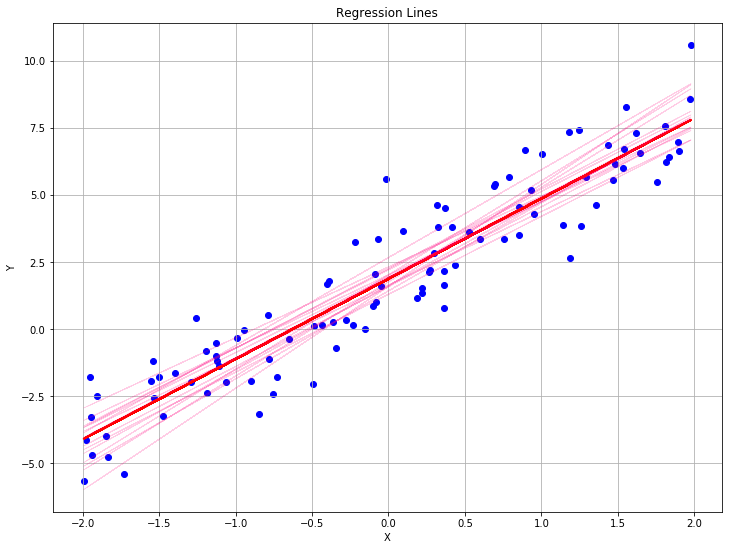

In [268]:
fig_rpns = plt.figure(figsize=(12, 9))

plt.scatter(X, Y, color='blue')
plt.plot(X, model_use_all.predict(X), color='red', linewidth= 2) 
for model in models:
    plt.plot(X, model.predict(X), color= (1, 0, 0.5, 0.2), linewidth=0.5)

plt.title('Regression Lines')
plt.xlabel('X') 
plt.ylabel('Y') 
plt.grid() 

In [269]:
model_use_all.coef_, model_use_all.intercept_

(array([[2.9906063]]), array([1.87228497]))

In [270]:
coef = 0
intercept = 0
for model in models:
    coef += model.coef_[0][0]
    intercept += model.intercept_[0]

In [285]:
coef/num_sub_models, intercept/num_sub_models

(3.077992005491725, 1.881575579823321)

In [284]:
model_use_all.score(X, Y) # r2_score(Y, model_use_all.predict(X)) でもよい

0.8812021771178091

0.8812021771178091